 
 hay 163 estaciones
	
las estaciones que con mas de dos interconexiones son: ['Pantitlán', 'San Lázaro', 'Candelaria', 'Pino Suárez', 'Salto del Agua', 'Balderas', 'Tacubaya', 'Tacuba', 'Hidalgo', 'Bellas Artes', 'Chabacano', 'Ermita', 'Deportivo 18 de Marzo', 'La Raza', 'Guerrero', 'Centro Médico', 'Zapata', 'Santa Anita', 'Jamaica', 'Morelos', 'Consulado', 'Instituto del Petróleo', 'Oceanía', 'Mixcoac', 'Garibaldi', 'Atlalilco'], en total 26, estaciones)

 _________________________________________________________________________________________________ 

La ruta mas optima entre Balbuena y UAM I es la siguiente: 
 ['Balbuena', 'Moctezuma', 'San Lázaro', 'Candelaria', 'Fray Servando', 'Jamaica', 'Santa Anita', 'Coyuya', 'Iztacalco', 'Apatlaco', 'Aculco', 'Escuadrón 201', 'Atlalilco', 'Iztapalapa', 'Cerro de la Estrella', 'UAM I'] pasando por 16 estaciones

 *** El grafico de la ruta, es el siguiente *** 


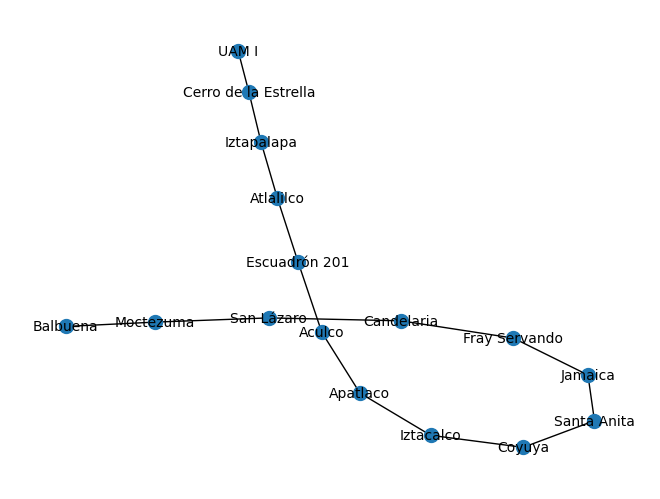

In [20]:
import pandas as pd
import numpy as np
import networkx as nx

# Leemos el dataset con las estaciones y distancias
df = pd.read_excel('metro.xlsx')

#Generamos el grafo, donde establecemos a que corresponde origen, destino y peso "longitud"
METRO = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Longitud de interestación')
#Cuantas estaciones hay. "Numero de vertices".
print(f" \n hay {METRO.order()} estaciones")
y=[]
#Cuantas estaciones tienen mas de una intersección o Aristas
for x in METRO.nodes():
    if METRO.degree(x) > 2:
         y.append(x)
print(f"\t")
print(f"las estaciones que con mas de dos interconexiones son: {y}, en total {len(y)}, estaciones)")
# Aplicamos el algoritmo de dijkstra para buscar la ruta mas corta entre estaciones dadas. 
#Solución mas optima a desde Balbuena a UAM I
Origen = 'Balbuena'
Destino = 'UAM I'
djk_path = nx.dijkstra_path(METRO, source=Origen, target=Destino, weight = True)
print("\n _________________________________________________________________________________________________ \n")
print(f"La ruta mas optima entre {Origen} y {Destino} es la siguiente: \n {djk_path} pasando por {len(djk_path)} estaciones")

#Graficamos la solución
print("\n *** El grafico de la ruta, es el siguiente *** ")
ruta1 = METRO.subgraph([i for i in djk_path ])
nx.draw(ruta1, with_labels=True, node_size = 100, font_size=10)